# 图像各向异性滤波

## 各向异性概念 

各向异性（英文名称：anisotropy）是指材料在各方向的力学和物理性能呈现差异的特性。晶体的各向异性即沿晶格的不同方向，原子排列的周期性和疏密程度不尽相同，由此导致晶体在不同方向的物理化学特性也不同，这就是晶体的各向异性。亦称“非均质性”。物体的全部或部分物理、化学等性质随方向的不同而各自表现出一定的差异的特性。即在不同的方向所测得的性能数值不同。对图像来说各向异性就是在每个像素点周围四个方向上梯度变化都不一样，滤波的时候我们要考虑图像的各向异性对图像的影响，而各向同性显然是说各个方向的值都一致，常见的图像均值或者高斯均值滤波可以看成是各向同性滤波。

## 各向异性滤波

是将图像看成物理学的力场或者热流场，图像像素总是向跟他的值相异不是很大的地方流动或者运动，这样那些差异大的地方(边缘)就得以保留，所以本质上各向异性滤波是图像边缘保留滤波器(EPF)。它在各个方向的扩散可以表示如下如下公式： 

![](doc_imgs/07.png)
![](doc_imgs/08.png)

## 用途

感知边缘的滤波器在计算摄影学领域用途广泛，主要用于以下几个方面，仅举几例。 
- 细节增强 
- HDR色调映射 
- 风格化 
- 铅笔画 
- 联合滤波 
- 灰度图像彩色话等

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as io
import skimage.color as color
import cv2

In [17]:
def anisotropy(src,k=15,lambda_val = 0.25):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    k2 = k ** 2
    for i in range(1,rows-1):
        for j in range(1,cols -1):
            n = srcf[i - 1,j] - srcf[i,j]
            s = srcf[i + 1,j] - srcf[i,j]
            e = srcf[i,j - 1] - srcf[i,j]
            w = srcf[i,j + 1] - srcf[i,j]

            nc = np.exp(-(n**2 / k2) ** 2)
            sc = np.exp(-(s**2 / k2) ** 2)
            ec = np.exp(-(e**2 / k2)**2)
            wc = np.exp(-(w**2 / k2)**2)
            dst[i,j] = srcf[i,j] + lambda_val * (n * nc + s * sc + e * ec + w * wc)
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [4]:
src = io.imread('../datas/face3.jpg')

In [10]:
dst = anisotropy(src)

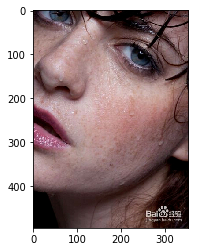

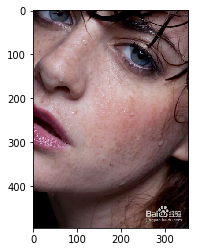

In [12]:
plt.figure()
plt.imshow(src)
plt.figure()
plt.imshow(dst)

In [14]:
for i in range(20):
    dst = src.copy()
    dst = anisotropy(dst)

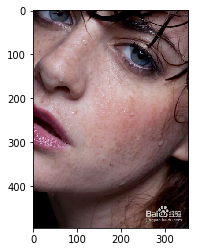

In [15]:
plt.imshow(dst):
 

# 代码优化

In [18]:
def anisotropy2(src,k=15,lambda_val=0.25,iteration = 1):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    diff1 = np.zeros((rows + 2,cols + 2,3),dtype=srcf.dtype)
    diff1[1:rows+1,1:cols+1] = srcf
    
    deltaN = diff1[0:rows,1:cols+1] - srcf
    deltaS = diff1[1:rows+1,1:cols+1] - srcf
    deltaE = diff1[1:rows+1,2:cols+2] - srcf
    deltaW = diff1[1:rows+1,0:cols] - srcf
    kappa = k ** 2
    cN = np.exp(-(deltaN**2 / kappa) ** 2)
    cS = np.exp(-(deltaS**2 / kappa) ** 2)
    cE = np.exp(-(deltaE**2 / kappa) ** 2)
    cW = np.exp(-(deltaW**2 / kappa) ** 2)
    diff = diff1[1:rows+1,1:cols+1] + lambda_val * (cN * deltaN + \
                                 cS * deltaS + \
                                 cE * deltaE +\
                                 cW * deltaW)
    diff = np.clip(diff,0,255)
    diff = np.uint8(diff)
    return diff

In [19]:
dst = anisotropy2(src)

Text(0.5,1,'DST')

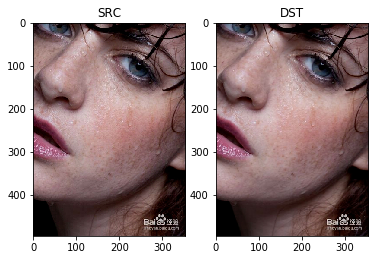

In [21]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST')

In [22]:
dst = src.copy()
for i in range(10):
    dst = anisotropy2(dst)

Text(0.5,1,'DST:iteration=10')

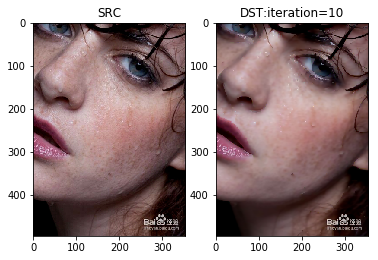

In [23]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST:iteration=10')

参考：

[1].https://blog.csdn.net/jia20003/article/details/78415384

[2].https://blog.csdn.net/bluecol/article/details/46690985

[3].https://blog.csdn.net/guyuealian/article/details/78666973